<a href="https://colab.research.google.com/github/duocclases/SCA-202101-MineriaDatos-02-TEAM01/blob/main/Duoc_MineriaDatos_SeleccionVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#PASO 1 Incluir librerías para el trabajo con el modelo

#Librerías Base
import pandas as pd #trabajo con datos
from pandas import set_option
import numpy as np #para trabajo con numeros y matrices
import matplotlib as mpl
import matplotlib.pyplot as plt #para graficar


#Librerías para modelos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #separar automáticamente los datos en entrenamiento y validación
from sklearn.linear_model import LinearRegression #regresión lineal


In [3]:
#PASO 2: Cargar los datos
from sklearn.datasets import load_boston

dataset_info = load_boston()
X,y = load_boston(return_X_y=True)

#dataset = pd.read_csv("Sueldos.xls")


In [5]:
dataX = pd.DataFrame(X, columns=dataset_info.feature_names)

In [ ]:
#PASO 3: Entender los datos

In [9]:
#PASO 3.1 --> Ver datos
dataX.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
dataX.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [10]:
dataX.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [21]:
set_option('display.width', 100)
set_option('precision', 2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


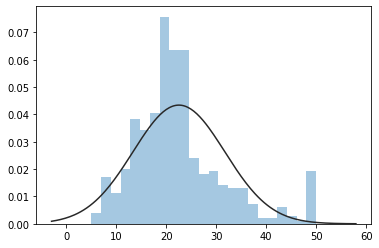

In [30]:
#Grafico de distribución para la variable Y --> si la distribución se parece a normal, es viable construir un modelo con los datos
import seaborn as sns
import scipy.stats as st

sns.distplot(tuple(y), kde=False, fit=st.norm)

In [24]:
#Análisis de Corerlación de Variables --> ¿existen dos variables que explican lo mismo?
correlacion = dataX.corr()
correlacion.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54


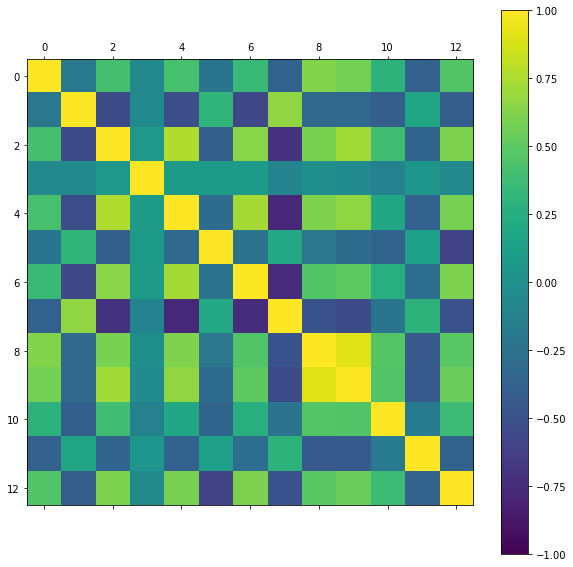

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlacion, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

#conclusión: podría eliminar la variable 8(RAD) o 9(TAX) (nivel de correlación = 0.91 )
#            podría eliminar la variable 8(RAD) o 9(TAX) (nivel de correlación = 0.91 )

#INDUS | DIS  -0.71
#INDUS | TAX   0.72
#RAD   | TAX   0.91

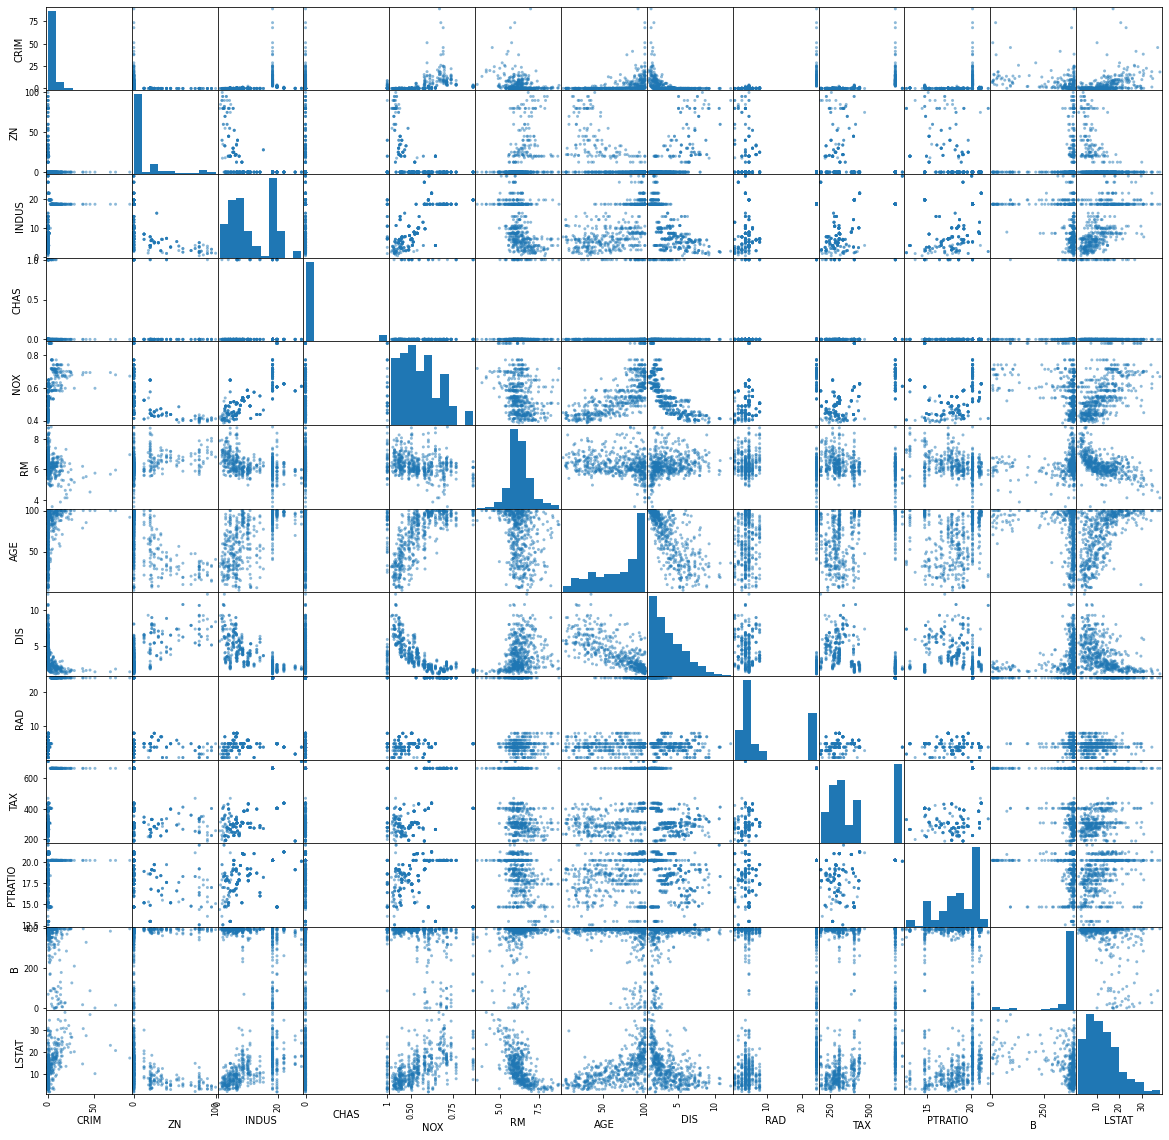

In [28]:
from pandas.plotting import scatter_matrix
#plt.figure(figsize=(20,20))
scatter_matrix(dataX, figsize=(20,20))
plt.show()

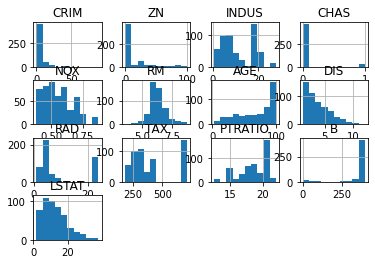

In [33]:
#Graficos de distribución de los valores

dataX.hist()
plt.show()

In [34]:
#SESGO (SKEW): 
skew = dataX.skew()
skew.head(20)

#valores positivos (sesgo a la derecha), valores negativos (sesgo a la izquierda), valores cercanos a 0 muestran menos sesgo

CRIM       5.22
ZN         2.23
INDUS      0.30
CHAS       3.41
NOX        0.73
RM         0.40
AGE       -0.60
DIS        1.01
RAD        1.00
TAX        0.67
PTRATIO   -0.80
B         -2.89
LSTAT      0.91
dtype: float64

<Figure size 1440x1440 with 0 Axes>

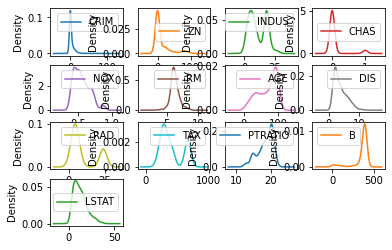

In [36]:
#graficos de densidad
plt.figure(figsize=(20,20))
dataX.plot(kind='density', subplots=True, layout=(4,4), sharex=False, )
plt.show()

In [37]:
#PASO 3.2 --> Separación previa



X: 506 , train: 404 , test:  102


In [ ]:
#PASO 4: Limpieza y Transformación de datos



In [39]:
#PASO 5: Separar datos en entrenamiento y Validación

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)


In [40]:
print("X: ", X.shape, "X_train:", X_train.shape, "X_test:", X_test.shape, "y:", y.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

X:  (506, 13) X_train: (404, 13) X_test: (102, 13) y: (506,) y_train: (404,) y_test: (102,)


In [43]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
#selección de características
  #reducir el sobre-entrenmaiento (overfitting)
  #mejorar el accuracy (accuracy = rendimiento del modelo o nivel de predicción)
  #reducir el tiempo de entrenamiento (reducir la cantidad de variables que requiere mi modelo para poder funcionar)

In [48]:
#seleccion univariada
#test estadístico puede ser usado para seleccionar las características que tienen una relación fuerte con la variable a predecir
from numpy import set_printoptions
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

test = SelectKBest(score_func=f_classif, k=4)
set_printoptions(precision=3)
fit = test.fit(X_train, y_train)
print(fit.scores_)
print("CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT")

#elegir las variables que tengan los valores más altos

[3.952 1.513 1.975 1.096 1.935 2.308 2.015 1.453 1.944 2.137 1.672 1.883
 5.264]
CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT


In [51]:
#Eliminación de características recursivas (RFE)
#remueve recursivamente atributos y construye un modelo con los atributos restantes, usa el accuracy delmodelo para identificar cuales atributos quedan.
#
from sklearn.feature_selection import RFE

#regresión Logistica para predecir modelos de clasificación
#regresión lineal para predecir modelos de regresión (numeros continuos)
model = LinearRegression()
rfe = RFE(model, 1)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("selected features:", fit.support_)
print("Feature ranking:", fit.ranking_)
print("CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT")

Num Features: 1
selected features: [False False False False False False False False False False False False
  True]
Feature ranking: [11  8 12 10  7  2 13  6  4  5  3  9  1]
CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT


In [54]:
#importancia de características
#utiliza un modelo llamado "random forest (muchos arboles de decisión)", puede ser utilizado para estimar la importancia

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(model.feature_importances_)
print("CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT")

#mientras más grande, mayor importancia de la variable

[0.045 0.001 0.006 0.001 0.017 0.329 0.014 0.073 0.004 0.012 0.014 0.013
 0.471]
CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT


In [ ]:
#PASO 6: Entrenamiento del Modelo

In [57]:
#PASO 6.1 --> Definición del tipo de modelo que usaremos
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor

modelos_nombres = ["LinearRegression", 
                   "RidgeCV", 
                   "LassoCV", 
                   "RadmonForest", 
                   "GBDT", 
                   "SVR", 
                   "ElasticNet", 
                   "XGBOOS"]
modelos_funct = [LinearRegression(),
                 RidgeCV(alphas=(0.001,0.01, 1), cv=3),
                 LassoCV(alphas=(0.001,0.01, 1), cv=5),
                 RandomForestRegressor(n_estimators=30),
                 SVR(),
                 ElasticNet(alpha=0.001, max_iter=1000),
                 XGBRegressor()
                 ]

In [60]:
from sklearn.metrics import r2_score

def R2(model, X_train, X_test, y_train, y_test):
  model_fitted = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = r2_score(y_test, y_pred)
  return score

In [61]:
scores = []

for name, modelf in zip(modelos_nombres, modelos_funct):
  score = R2(modelf, X_train, X_test, y_train, y_test)
  print("{}: score {:.6f}".format(name, score.mean()))

LinearRegression: score 0.766983
RidgeCV: score 0.767692
LassoCV: score 0.767772
RadmonForest: score 0.859078
GBDT: score 0.744427
SVR: score 0.767176
[15:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
ElasticNet: score 0.851591


In [ ]:
#PASO 7: Validar el Modelo